In [2]:
import os
import glob
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [3]:
path = r"C:\Users\kapuj\Desktop\market"

In [4]:
all_files = glob.glob(os.path.join(path, "*.csv"))

In [5]:
dff = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [6]:
dff.reset_index(inplace=True,drop=True)

# Problem Statement
    - The agricultural sector in Telangana faces challenges related to fluctuating commodity prices, which directly impact both farmers' income and consumer pricing. By examining daily price data across multiple years (2021-2025) for a wide range of agricultural commodities, this analysis seeks to uncover significant trends, seasonal patterns, and periods of high volatility.
    - From this analysis we can make monthly analysis for farmer of price fluctuations and can able to know that which crop has more demand for every month and where(location).

# Data Description

# Daily Prices of Market Yard Commodities in Telangana
    Agriculture
    Organisation: Agricultural Marketing and Co-operation Department
    
    Data available from 01-01-2014 to 31-03-2025
    
    This dataset contains information on the daily prices of all the commodities across all the market yards in the state of Telangana 
    
    Contains the below columns: | DDate | AmcCode | AmcName | YardCode | YardName | CommCode | CommName | VarityCode | VarityName | Arrivals | Minimum | Maximum | Modal |
     
    Abbreviation: 
     
    * DDate: Date 
    * AmcCode: Agricultural Market Committee Code 
    * AmcName: Agricultural Market Committee Name 
    * YardCode: Agricultural Market Yard Code 
    * YardName: Agricultural Market Yard Name 
    * CommCode: Commodity Code 
    * CommName: Commodity Name 
    * VarityCode: Commodity Variety Code 
    * VarityName: Commodity Variety Name 
    * Arrivals: Quantity in Quintals (Qtls) 
    * Minimum: Minimum Price per Quintal 
    * Maximum: Maximum Price per Quintal
    * Modal: Modal Price is the price per quintal at which most transactions took place

In [7]:
dff.sample()

,DDate,AmcCode,AmcName,YardCode,YardName,CommCode,CommName,VarityCode,VarityName,Arrivals,Minimum,Maximum,Model,ProgArrivals,Valuation,MarketFee
367855,2021-11-06 00:00:00+05:30,324,Bowenpally,3,Bowenpally,118,Field Beans,118,Common,83.0,2000.0,8000.0,5500.0,0.0,0.0,0.0


In [8]:
dff.describe()

,AmcCode,YardCode,CommCode,VarityCode,Arrivals,Minimum,Maximum,Model,ProgArrivals,Valuation,MarketFee
count,436910.000000,436910.000000,436910.000000,436910.000000,4.369100e+05,4.369100e+05,4.369100e+05,4.369100e+05,423956.0,423956.0,423956.0
mean,299.862976,754.143011,88.593433,127.931979,3.854163e+02,5.722272e+07,3.785589e+03,3.465905e+03,0.0,0.0,0.0
std,45.333890,649.228663,54.443751,74.150903,4.466646e+03,3.782196e+10,4.908014e+03,8.454631e+04,0.0,0.0,0.0
min,186.000000,1.000000,1.000000,1.000000,1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
25%,278.000000,6.000000,31.000000,98.000000,9.000000e+00,1.000000e+03,1.600000e+03,1.400000e+03,0.0,0.0,0.0
50%,322.000000,886.000000,105.000000,115.000000,4.000000e+01,1.888000e+03,2.500000e+03,2.200000e+03,0.0,0.0,0.0
75%,325.000000,1330.000000,118.000000,195.000000,2.210000e+02,3.209000e+03,5.000000e+03,4.059000e+03,0.0,0.0,0.0
max,379.000000,1728.000000,270.000000,330.000000,1.743030e+06,2.500000e+13,1.501500e+06,5.426152e+07,0.0,0.0,0.0


In [9]:
dff

,DDate,AmcCode,AmcName,YardCode,YardName,CommCode,CommName,VarityCode,VarityName,Arrivals,Minimum,Maximum,Model,ProgArrivals,Valuation,MarketFee
0,2021-01-01 00:00:00+05:30,367,Gudimalkapur,1571,Gudumalkapur,55,Onions,55,Common,614.0,1000.0,2500.0,1500.0,NaN,NaN,NaN
1,2021-01-01 00:00:00+05:30,323,Gaddiannaram,1,Gaddiannaram,76,Mango,291,Benishan,19.0,2200.0,6660.0,3600.0,NaN,NaN,NaN
2,2021-01-01 00:00:00+05:30,325,Hyderabad,5,Mahabubmansion,54,Chillies(Dry),219,No.I,62.0,8000.0,14000.0,10000.0,NaN,NaN,NaN
3,2021-01-02 00:00:00+05:30,323,Gaddiannaram,1,Gaddiannaram,76,Mango,291,Benishan,22.0,2200.0,5550.0,3300.0,NaN,NaN,NaN
4,2021-01-02 00:00:00+05:30,323,Gaddiannaram,2,L.B Nagar,98,Cabbage,98,Common,88.0,500.0,700.0,600.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436905,2024-12-28 00:00:00+05:30,246,Warangal,886,Warangal,199,Capsicum,204,Common,15.0,4500.0,5000.0,4750.0,0.0,0.0,0.0
436906,2024-12-27 00:00:00+05:30,246,Warangal,886,Warangal,199,Capsicum,204,Common,13.0,4500.0,5000.0,4750.0,0.0,0.0,0.0
436907,2024-12-24 00:00:00+05:30,246,Warangal,886,Warangal,199,Capsicum,204,Common,11.0,4500.0,5000.0,4750.0,0.0,0.0,0.0
436908,2024-12-25 00:00:00+05:30,246,Warangal,886,Warangal,199,Capsicum,204,Common,11.0,4500.0,5000.0,4750.0,0.0,0.0,0.0


In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436910 entries, 0 to 436909
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DDate         436910 non-null  object 
 1   AmcCode       436910 non-null  int64  
 2   AmcName       436910 non-null  object 
 3   YardCode      436910 non-null  int64  
 4   YardName      436910 non-null  object 
 5   CommCode      436910 non-null  int64  
 6   CommName      436910 non-null  object 
 7   VarityCode    436910 non-null  int64  
 8   VarityName    436910 non-null  object 
 9   Arrivals      436910 non-null  float64
 10  Minimum       436910 non-null  float64
 11  Maximum       436910 non-null  float64
 12  Model         436910 non-null  float64
 13  ProgArrivals  423956 non-null  float64
 14  Valuation     423956 non-null  float64
 15  MarketFee     423956 non-null  float64
dtypes: float64(7), int64(4), object(5)
memory usage: 53.3+ MB


# DATA Cleaning

In [11]:
dff.drop(columns=['ProgArrivals','Valuation','MarketFee',"AmcCode","YardCode","CommCode","VarityCode"],inplace=True)

In [12]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436910 entries, 0 to 436909
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DDate       436910 non-null  object 
 1   AmcName     436910 non-null  object 
 2   YardName    436910 non-null  object 
 3   CommName    436910 non-null  object 
 4   VarityName  436910 non-null  object 
 5   Arrivals    436910 non-null  float64
 6   Minimum     436910 non-null  float64
 7   Maximum     436910 non-null  float64
 8   Model       436910 non-null  float64
dtypes: float64(4), object(5)
memory usage: 30.0+ MB


In [13]:
dff.drop(dff[dff["Model"]==0].index,inplace=True)

In [14]:
dff

,DDate,AmcName,YardName,CommName,VarityName,Arrivals,Minimum,Maximum,Model
0,2021-01-01 00:00:00+05:30,Gudimalkapur,Gudumalkapur,Onions,Common,614.0,1000.0,2500.0,1500.0
1,2021-01-01 00:00:00+05:30,Gaddiannaram,Gaddiannaram,Mango,Benishan,19.0,2200.0,6660.0,3600.0
2,2021-01-01 00:00:00+05:30,Hyderabad,Mahabubmansion,Chillies(Dry),No.I,62.0,8000.0,14000.0,10000.0
3,2021-01-02 00:00:00+05:30,Gaddiannaram,Gaddiannaram,Mango,Benishan,22.0,2200.0,5550.0,3300.0
4,2021-01-02 00:00:00+05:30,Gaddiannaram,L.B Nagar,Cabbage,Common,88.0,500.0,700.0,600.0
...,...,...,...,...,...,...,...,...,...
436905,2024-12-28 00:00:00+05:30,Warangal,Warangal,Capsicum,Common,15.0,4500.0,5000.0,4750.0
436906,2024-12-27 00:00:00+05:30,Warangal,Warangal,Capsicum,Common,13.0,4500.0,5000.0,4750.0
436907,2024-12-24 00:00:00+05:30,Warangal,Warangal,Capsicum,Common,11.0,4500.0,5000.0,4750.0
436908,2024-12-25 00:00:00+05:30,Warangal,Warangal,Capsicum,Common,11.0,4500.0,5000.0,4750.0


In [15]:
# Removes time from the column
dff['DDate']=dff['DDate'].str.split(" ").apply(lambda x:x[0])

In [16]:
dff["DDate"] = pd.to_datetime(dff["DDate"])

In [17]:
dff["Revenue"] = dff['Arrivals']*dff['Model']

In [18]:
dff

,DDate,AmcName,YardName,CommName,VarityName,Arrivals,Minimum,Maximum,Model,Revenue
0,2021-01-01,Gudimalkapur,Gudumalkapur,Onions,Common,614.0,1000.0,2500.0,1500.0,921000.0
1,2021-01-01,Gaddiannaram,Gaddiannaram,Mango,Benishan,19.0,2200.0,6660.0,3600.0,68400.0
2,2021-01-01,Hyderabad,Mahabubmansion,Chillies(Dry),No.I,62.0,8000.0,14000.0,10000.0,620000.0
3,2021-01-02,Gaddiannaram,Gaddiannaram,Mango,Benishan,22.0,2200.0,5550.0,3300.0,72600.0
4,2021-01-02,Gaddiannaram,L.B Nagar,Cabbage,Common,88.0,500.0,700.0,600.0,52800.0
...,...,...,...,...,...,...,...,...,...,...
436905,2024-12-28,Warangal,Warangal,Capsicum,Common,15.0,4500.0,5000.0,4750.0,71250.0
436906,2024-12-27,Warangal,Warangal,Capsicum,Common,13.0,4500.0,5000.0,4750.0,61750.0
436907,2024-12-24,Warangal,Warangal,Capsicum,Common,11.0,4500.0,5000.0,4750.0,52250.0
436908,2024-12-25,Warangal,Warangal,Capsicum,Common,11.0,4500.0,5000.0,4750.0,52250.0


In [19]:
clms = list(dff.columns)

In [20]:
clms

['DDate',
 'AmcName',
 'YardName',
 'CommName',
 'VarityName',
 'Arrivals',
 'Minimum',
 'Maximum',
 'Model',
 'Revenue']

In [21]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436100 entries, 0 to 436909
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DDate       436100 non-null  datetime64[ns]
 1   AmcName     436100 non-null  object        
 2   YardName    436100 non-null  object        
 3   CommName    436100 non-null  object        
 4   VarityName  436100 non-null  object        
 5   Arrivals    436100 non-null  float64       
 6   Minimum     436100 non-null  float64       
 7   Maximum     436100 non-null  float64       
 8   Model       436100 non-null  float64       
 9   Revenue     436100 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 36.6+ MB


In [22]:
dff.head(4)

,DDate,AmcName,YardName,CommName,VarityName,Arrivals,Minimum,Maximum,Model,Revenue
0,2021-01-01,Gudimalkapur,Gudumalkapur,Onions,Common,614.0,1000.0,2500.0,1500.0,921000.0
1,2021-01-01,Gaddiannaram,Gaddiannaram,Mango,Benishan,19.0,2200.0,6660.0,3600.0,68400.0
2,2021-01-01,Hyderabad,Mahabubmansion,Chillies(Dry),No.I,62.0,8000.0,14000.0,10000.0,620000.0
3,2021-01-02,Gaddiannaram,Gaddiannaram,Mango,Benishan,22.0,2200.0,5550.0,3300.0,72600.0


In [23]:
x=[]
for i in clms:
    if dff[i].dtype == "object":
        j = {i       :  dff[i].unique(),
            "length" : len(dff[i].unique()),
             "min"   : dff[i].min(),
             "max"   : dff[i].max()}
        x.append(j)
        print(j)
        print("--------------------------------------------------------------------------")

{'AmcName': array(['Gudimalkapur', 'Gaddiannaram', 'Hyderabad', 'Pargi', 'Tandur',
       'Suryapet', 'Mahbubnagar', 'Narayanpet', 'Navabpet(MBNR)',
       'Thirumalagiri', 'Vemulawada', 'Badepally', 'Shadnagar',
       'Devarakadra', 'Burgampahad', 'Nagarkurnool', 'Karimnagar',
       'Wanaparthy Town', 'Atmakur(WNP)', 'Nizamabad', 'Kesamudram',
       'Vantimamidi', 'Choppadandi', 'Asifabad', 'Enkoor', 'Peddapally',
       'Gajwel', 'Nekkonda', 'Jainath', 'Bhongir', 'Jagtial', 'Vikarabad',
       'Adilabad', 'Boath', 'Sadasivpet', 'Luxettipet', 'Cherial',
       'Parkal', 'Chouttuppal', 'Khammam', 'Kubeer', 'Sarangapur',
       'Nakrekal', 'Ghanpur', 'Jammikunta', 'Khanapur', 'Metpally',
       'Achampet', 'Ichoda', 'Jogipet', 'Madnoor', 'Warangal',
       'Wanaparthy Road', 'Bowenpally', 'Chennur', 'Ibrahimpatnam(RR)',
       'Narsingi', 'Alair', 'Korutla', 'Yellareddy', 'Birkur', 'Kollapur',
       'Thorrur', 'Bellampally', 'Kataram', 'Mahabubabad', 'Pitlam',
       'Gadwal', 'Pala

dff['Day']   = dff["DDate"].dt.strftime('%d')
dff['Month'] = dff["DDate"].dt.strftime('%b')
dff['Year']  = dff["DDate"].dt.strftime('%y')

In [24]:
dff.shape

(436100, 10)

In [25]:
dff.drop(dff[dff['DDate'].dt.year==25].index,inplace=True)

In [26]:
dff.columns

Index(['DDate', 'AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model', 'Revenue'],
      dtype='object')

In [27]:
dff["Month"]=dff["DDate"].dt.strftime("%b")

In [28]:
dff["Year"]=dff["DDate"].dt.year

In [29]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue']]

In [30]:
df.head(3)

,DDate,AmcName,YardName,CommName,VarityName,Arrivals,Minimum,Maximum,Model,Revenue
0,2021-01-01,Gudimalkapur,Gudumalkapur,Onions,Common,614.0,1000.0,2500.0,1500.0,921000.0
1,2021-01-01,Gaddiannaram,Gaddiannaram,Mango,Benishan,19.0,2200.0,6660.0,3600.0,68400.0
2,2021-01-01,Hyderabad,Mahabubmansion,Chillies(Dry),No.I,62.0,8000.0,14000.0,10000.0,620000.0


# Analizing and Vizualising

## Q1).To know which commodities are most arrivals and most revenue generated from 2021 to 2024

In [30]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Month']]

In [31]:
# top 10
top_arrivals = df.groupby('CommName')["Arrivals"].sum().reset_index()
most_common = top_arrivals.sort_values(by=['Arrivals'],ascending=False)

In [32]:
most_common = most_common.head(10)

In [33]:
most_common.reset_index()

,index,CommName,Arrivals
0,74,Paddy,2.767494e+07
1,29,Cotton,1.883743e+07
2,72,Onions,1.538468e+07
3,23,Chillies(Dry),1.053702e+07
4,79,Potato,7.863425e+06
5,38,Eucalyptus,7.776029e+06
6,103,Tomato,7.695374e+06
7,66,Maize,6.329504e+06
8,67,Mango,5.307474e+06
9,55,Groundnut pods,4.602977e+06


Text(0.5, 1.0, 'Commodities that are most arrivals in the state')

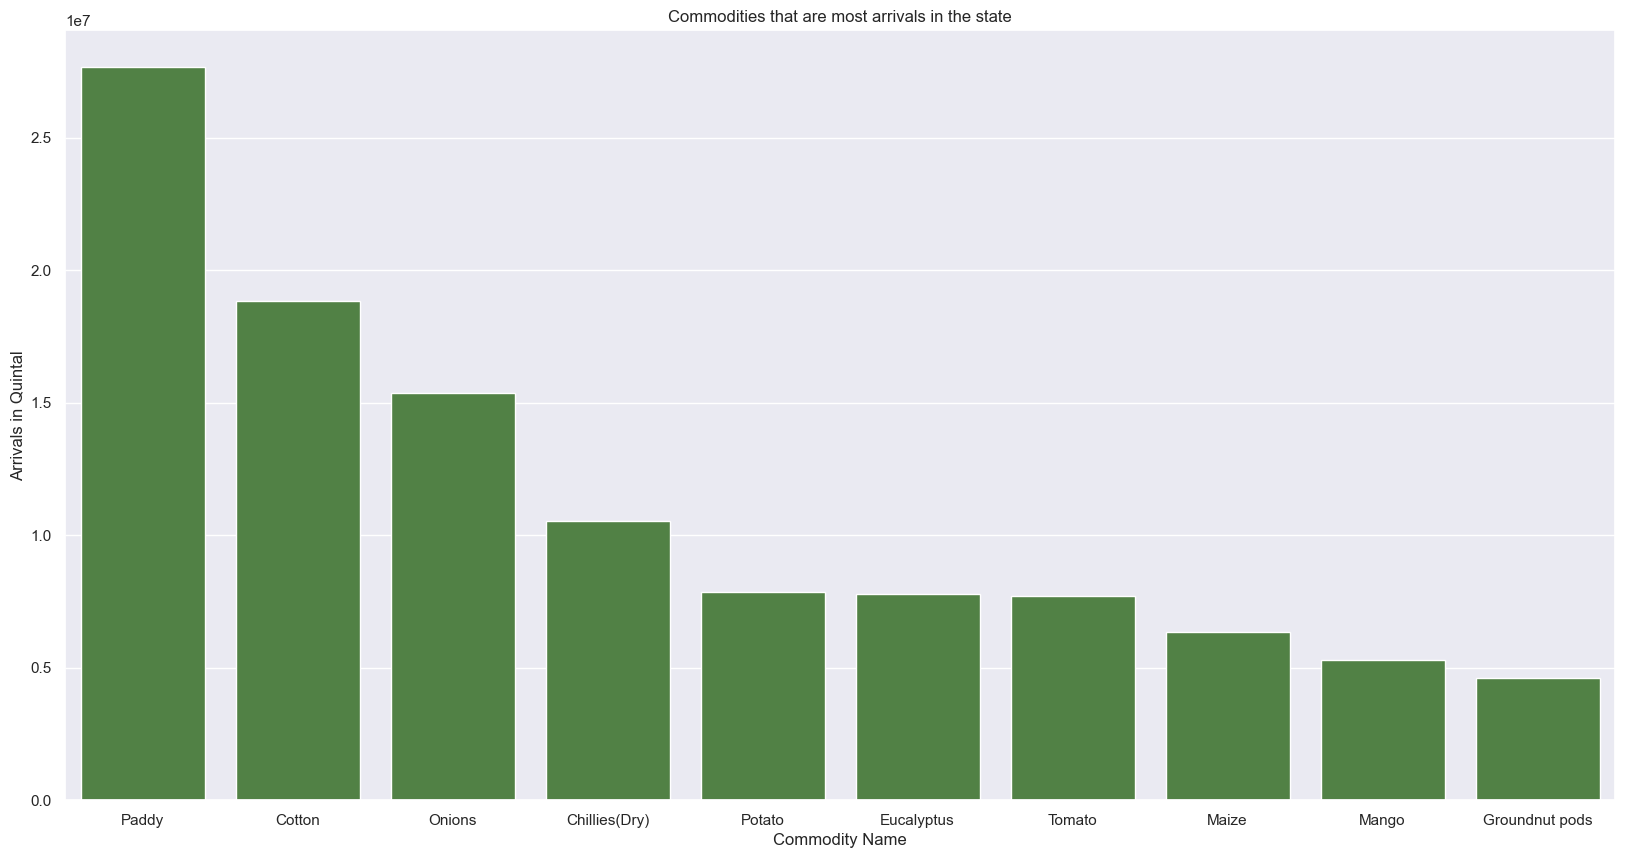

In [34]:
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.barplot(most_common,x='CommName',y='Arrivals',color = '#4B8B3B')
plt.xlabel('Commodity Name')
plt.ylabel('Arrivals in Quintal')
plt.title('Commodities that are most arrivals in the state')

Text(0.5, 1.0, 'Commodities that generate more Revenue')

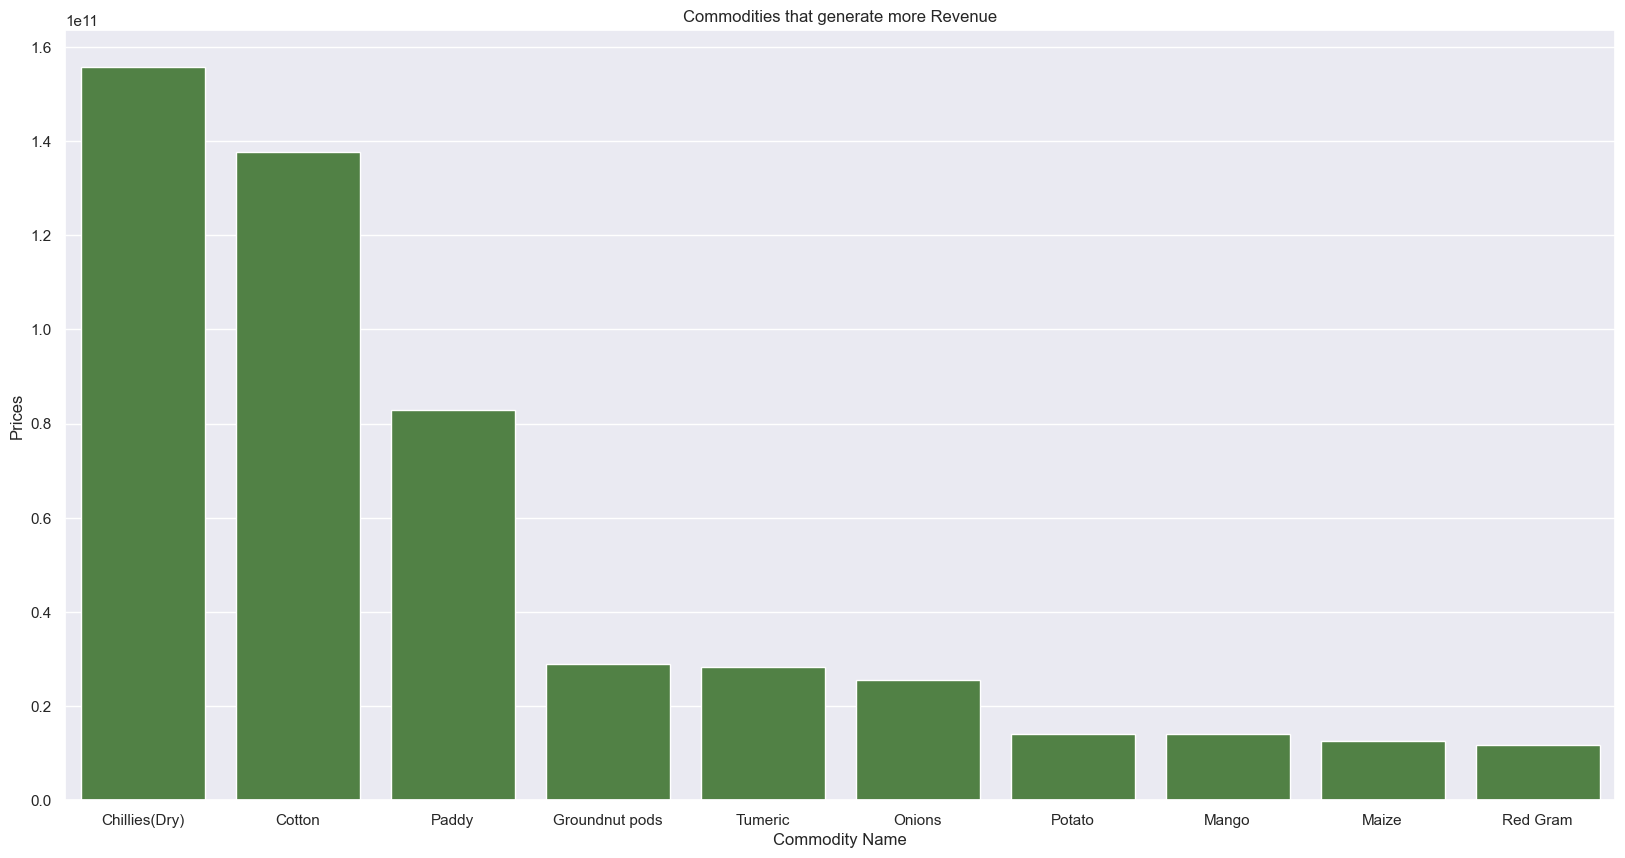

In [35]:
top_revenues = df.groupby('CommName')["Revenue"].sum().reset_index()
most_common = top_revenues.sort_values(by=['Revenue'],ascending=False)
most_common = most_common.head(10)
most_common.reset_index()
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.barplot(most_common,x='CommName',y='Revenue',color = '#4B8B3B')
plt.xlabel('Commodity Name')
plt.ylabel('Prices')
plt.title('Commodities that generate more Revenue')

In [36]:
most_common.reset_index()

,index,CommName,Revenue
0,23,Chillies(Dry),1.558035e+11
1,29,Cotton,1.377242e+11
2,74,Paddy,8.280224e+10
3,55,Groundnut pods,2.887291e+10
4,104,Tumeric,2.835755e+10
5,72,Onions,2.558071e+10
6,79,Potato,1.407541e+10
7,67,Mango,1.400325e+10
8,66,Maize,1.260436e+10
9,84,Red Gram,1.172578e+10


Telangana is a leading agricultural producer in India, particularly known for its rice and cotton production.

Production:

    Food Security: Since Paddy has the highest arrivals in the state, policymakers can prioritize storage, distribution, and price stabilization strategies to ensure steady food supply.
    Market Trends: Tracking arrivals of Cotton, Onions, Chillies, Potato, and Tomato helps predict demand and optimize farming practices for better yields.
    Environmental Impact: Monitoring commodities like Eucalyptus helps balance demand while maintaining sustainable forestry practices.
    Farmer Welfare: Identifying peak arrival periods enables farmers to maximize profits by selling at the right time and location.

Revenue :
    
    Since Chillies (Dry), Cotton, and Paddy generate the most revenue, policymakers can focus on improving production efficiency for these crops.
    Farmers can benefit from understanding which commodities yield the highest revenue, helping them choose what to grow for better earnings.
    Identifying high-revenue crops allows better price regulation, preventing extreme fluctuations and protecting both producers and consumers.
    Strong revenue generation in agriculture translates to job creation, infrastructure development, and overall regional prosperity.
    Supply Chain Optimization: With commodities like Groundnut pods, Turmeric, and Onions generating moderate revenue, investments can enhance storage and transportation efficiency.

## Q2).Top 5 Yards’ Contribution to Total Arrivals (Pie Chart)


In [37]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Month']]

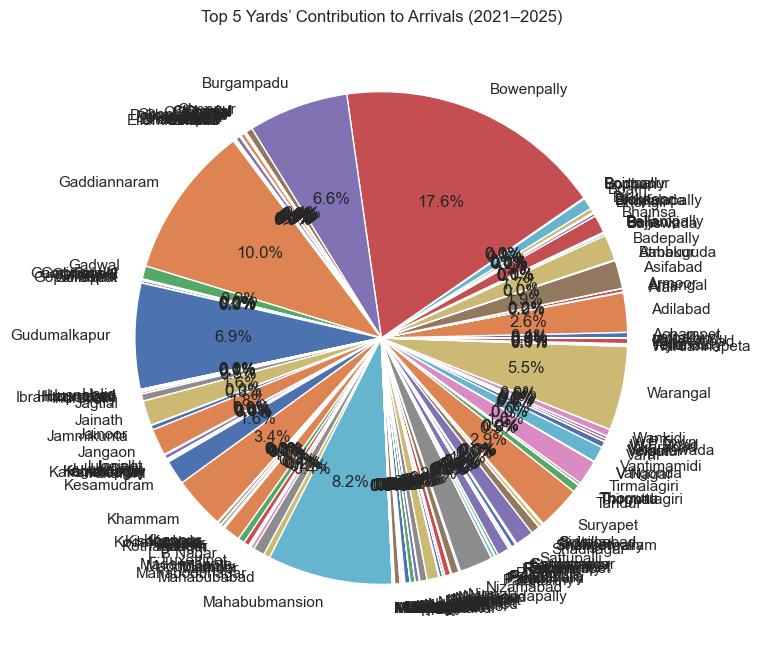

In [38]:
yard_arrivals = df.groupby('YardName')['Arrivals'].sum()
plt.figure(figsize=(8, 8))
plt.pie(yard_arrivals, labels=yard_arrivals.index, autopct='%1.1f%%')
plt.title('Top 5 Yards’ Contribution to Arrivals (2021–2025)')
plt.show()

    Top-Contributing Yards: Bowenpally leads with a 25.0% share of total arrivals, followed by Gaddiannaram (10.4%), Gudumalkapur (10.3%), Mahabubmansion (6.1%), and Warangal (5.5%).
    
    Commodity Analysis: The data includes a breakdown of commodities with the highest arrivals and revenue generation between 2021–2024.
    
    High-Volume Markets: There’s analysis on which market has the highest total arrivals for paddy, cotton, and groundnut from 2021–2025.
    
    Significance of High-Volume Markets: These markets influence supply chain optimization and help guide infrastructure investments for better efficiency.

## Q3).Daily Arrivals

In [39]:
dff['Year']=dff['DDate'].dt.year
dff['Month']=dff['DDate'].dt.strftime("%b")

In [40]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Year','Month']]

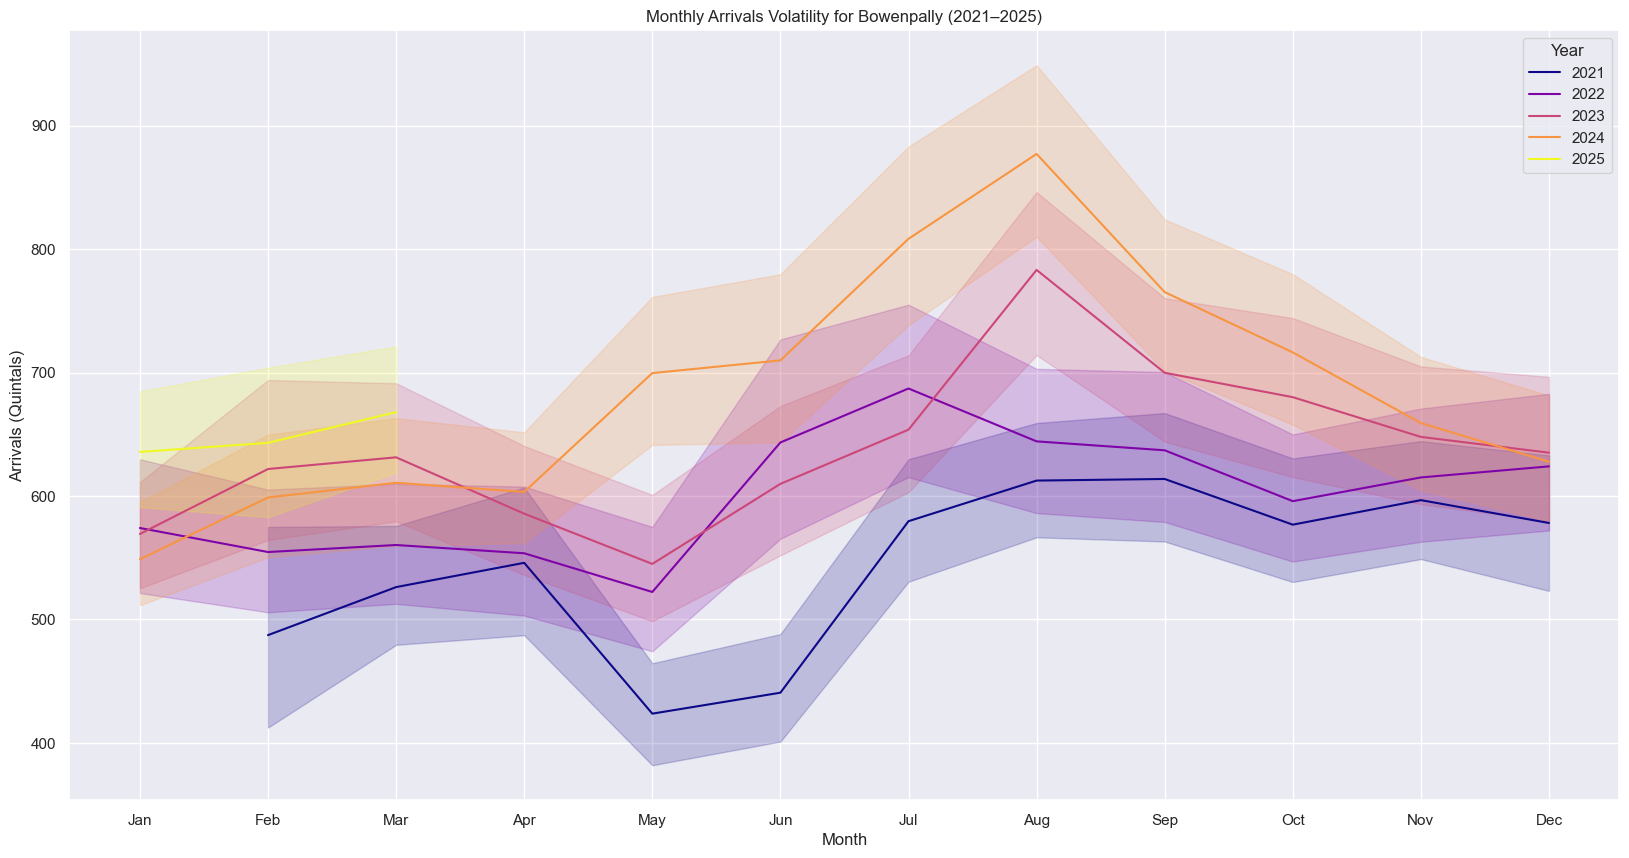

In [41]:
top_yard = df.groupby(['AmcName'])['Arrivals'].sum().idxmax()
yard_data = df[df['AmcName'] == top_yard][['Year','Month', 'Arrivals']]
sns.lineplot(yard_data,hue="Year",y="Arrivals",x='Month',palette="plasma")
plt.title(f'Monthly Arrivals Volatility for {top_yard} (2021–2025)')
plt.ylabel('Arrivals (Quintals)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

In [42]:
yard_data

,Year,Month,Arrivals
4682,2022,Jan,730.0
4696,2022,Jan,1073.0
4716,2022,Jan,657.0
4740,2022,Jan,435.0
4760,2022,Jan,420.0
...,...,...,...
436141,2024,Dec,368.0
436142,2024,Dec,6.0
436143,2024,Dec,5.0
436144,2024,Dec,4.0


- Insights:

        Identifies peak days for staffing/logistics.
        
        Guides storage planning for high-volatility periods.
        
        Supports rice export scheduling.
        
        Reflects demand growth (311M tonnes by 2030).

In [43]:
yard_data

,Year,Month,Arrivals
4682,2022,Jan,730.0
4696,2022,Jan,1073.0
4716,2022,Jan,657.0
4740,2022,Jan,435.0
4760,2022,Jan,420.0
...,...,...,...
436141,2024,Dec,368.0
436142,2024,Dec,6.0
436143,2024,Dec,5.0
436144,2024,Dec,4.0


In [44]:
yard_arrivals

YardName
Achampet       616824.41
Adilabad      4370891.35
Alair           54180.50
Amangal        397353.27
Armoor           5974.00
                 ...    
Yellandu            7.20
Yellareddy     162336.20
Zaheerabad     606286.75
motakondu        4172.00
vatpally         8343.00
Name: Arrivals, Length: 166, dtype: float64

In [45]:
top_yard

'Bowenpally'

## Q4).Top 5 Market Yards and Commodities by Arrivals (2021 to 2024 Sample)

In [31]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue']]

<Figure size 1000x600 with 0 Axes>

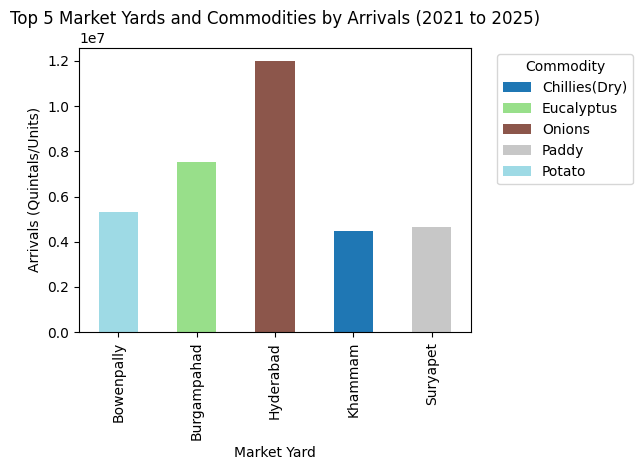

In [32]:
arrivals = df.groupby(['AmcName', 'CommName'])['Arrivals'].sum().nlargest(10).reset_index()

# Selects top 5 yards and top 5 commodities
top_yards = arrivals.groupby('AmcName')['Arrivals'].sum().nlargest(5).index
top_commodities = arrivals.groupby('CommName')['Arrivals'].sum().nlargest(5).index
filtered_arrivals = arrivals[arrivals['AmcName'].isin(top_yards) & arrivals['CommName'].isin(top_commodities)]

# Pivot for stacked bar plot
pivot_arrivals = filtered_arrivals.pivot(index='AmcName', columns='CommName', values='Arrivals').fillna(0)

# Plot
plt.figure(figsize=(10, 6))
pivot_arrivals.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Top 5 Market Yards and Commodities by Arrivals (2021 to 2025)')
plt.ylabel('Arrivals (Quintals/Units)')
plt.xlabel('Market Yard')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Real-World Utility: Identifying the busiest market yards in terms of total arrivals is essential for infrastructure planning and resource allocation. Market authorities can use this information to prioritize investments in facilities, transportation networks, and other support services to handle the high volumes of agricultural produce. This ensures efficient market operations, reduces congestion, and minimizes post-harvest losses. For traders, these markets represent key hubs for sourcing and distributing commodities, while for farmers, they offer the potential for reaching a larger number of buyers.

## Q5).Markets that has highest arrivals for specific commodities

In [48]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Month']]

In [49]:
mchac = df.groupby(['AmcName','CommName'])['Arrivals'].sum().sort_values(ascending=False).reset_index().head(10)

Text(0.5, 1.0, 'Markets that has highest arrivals for specific commodities')

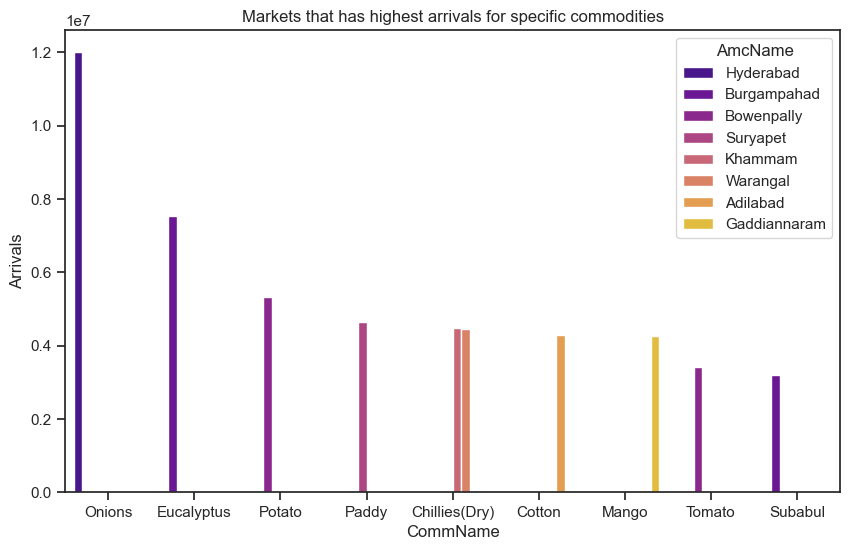

In [50]:
plt.figure(figsize=(10, 6))
sns.set_style("ticks")
sns.barplot(mchac,hue='AmcName',y='Arrivals',x='CommName',palette='plasma')
plt.xlabel('CommName')
plt.ylabel('Arrivals')
plt.title('Markets that has highest arrivals for specific commodities')

## Q6).Which market has the highest total arrivals for paddy, cotton, and Ground nut from 2021 to 2025?

    Why It Matters: High-volume markets are critical for supply chain optimization, guiding infrastructure investments.



In [51]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue']]

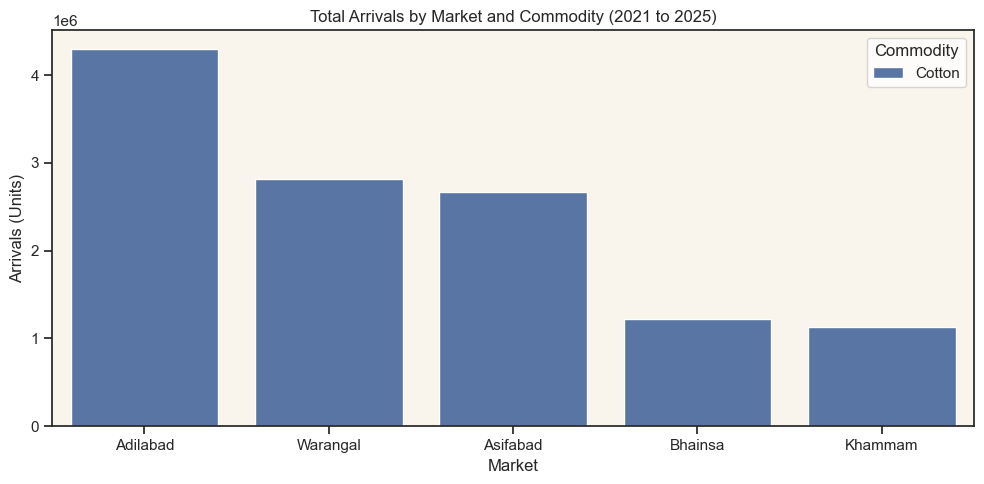

In [52]:
df = df[df['CommName'].isin(['Cotton'])]
market_arrivals = df.groupby(['AmcName', 'CommName'])['Arrivals'].sum().nlargest(5).reset_index().head(10)

# Plot
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#f9f5ec')
sns.barplot(data=market_arrivals, x='AmcName', y='Arrivals', hue='CommName')
plt.title('Total Arrivals by Market and Commodity (2021 to 2025)')
plt.ylabel('Arrivals (Units)')
plt.xlabel('Market')
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()

In [53]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue']]

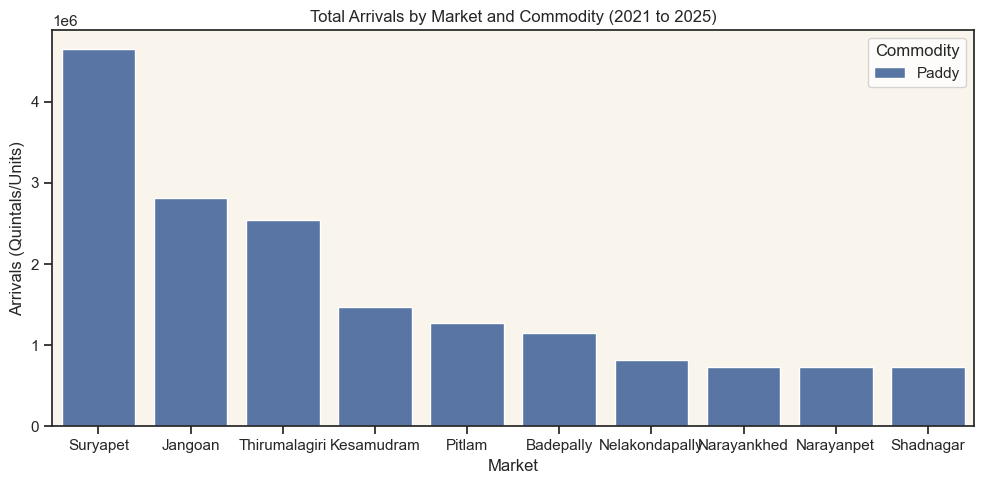

In [54]:
df = df[df['CommName'].isin(['Paddy'])]
market_arrivals = df.groupby(['AmcName', 'CommName'])['Arrivals'].sum().nlargest(10).reset_index().head(10)

# Plot
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#f9f5ec')
sns.barplot(data=market_arrivals, x='AmcName', y='Arrivals', hue='CommName')
plt.title('Total Arrivals by Market and Commodity (2021 to 2025)')
plt.ylabel('Arrivals (Quintals/Units)')
plt.xlabel('Market')
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()

In [55]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue']]

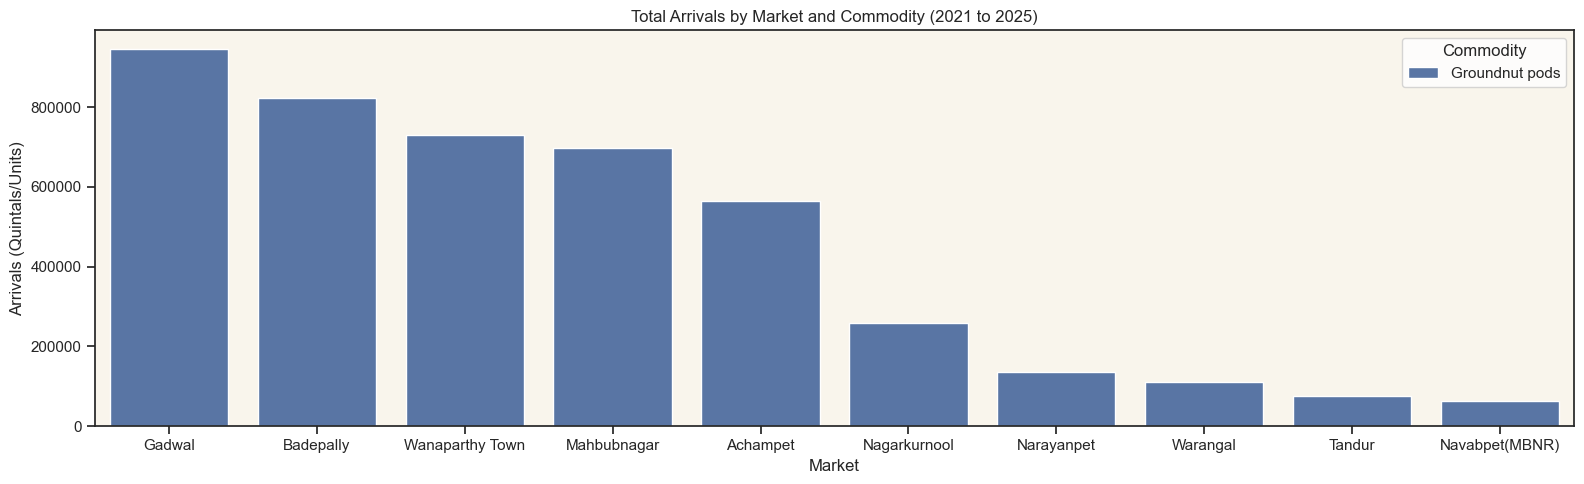

In [56]:
df = df[df['CommName'].isin(['Groundnut pods'])]
market_arrivals1 = df.groupby(['AmcName', 'CommName'])['Arrivals'].sum().nlargest(10).reset_index().head(10)

# Plot
plt.figure(figsize=(16, 5))
plt.gca().set_facecolor('#f9f5ec')
sns.barplot(data=market_arrivals1, x='AmcName', y='Arrivals', hue='CommName')
plt.title('Total Arrivals by Market and Commodity (2021 to 2025)')
plt.ylabel('Arrivals (Quintals/Units)')
plt.xlabel('Market')
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()

    Suryapet is the top yard for paddy, Adilabad for cotton, and Gadwal for Groundnut pods, guiding targeted investments.
    

Top Markets Identified:

    Gadwal, Badepally, and Wanaparthy Town are the leading markets for Groundnut pod arrivals, indicating strong production and market activity in southern Telangana.
    
    Societal Benefits:
    Helps farmers choose profitable markets, supports policymakers in improving mandi infrastructure, and aids in supply chain planning for traders and food agencies.
    
    Scope for Improvement:
    Invest in underperforming mandis, promote digital price/arrival info for farmers, and encourage crop diversification to balance regional agri-growth.


## Q7).Which months have peak Monthly Arrivals by Commodity from 2021 to 2025?
    Why It Matters: Peak months require enhanced logistics.

In [57]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Month']]

In [58]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = df['DDate'].dt.strftime('%b')
df['Year'] = df['DDate'].dt.year
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\2401500409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['DDate'].dt.strftime('%b')


In [59]:
monthly_arrivals = pd.DataFrame(df.groupby(['Month','CommName'])['Arrivals'].sum())

C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\3259603535.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_arrivals = pd.DataFrame(df.groupby(['Month','CommName'])['Arrivals'].sum())


In [60]:
monthly_arrivals

Arrivals
Month CommName                  
Jan   Ajwan              1438.50
      Amaranthus            0.00
      Amchur                0.00
      Amla              10726.00
      Apple            151370.50
...                          ...
Dec   Vegetables(All)       0.00
      Water Melon       77422.00
      Wheat               153.99
      Yam                7120.00
      mustard               0.00

[1320 rows x 1 columns]

In [61]:
peak_arrivals = monthly_arrivals.loc[monthly_arrivals.groupby('Month')['Arrivals'].idxmax()]

C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\1582810003.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peak_arrivals = monthly_arrivals.loc[monthly_arrivals.groupby('Month')['Arrivals'].idxmax()]


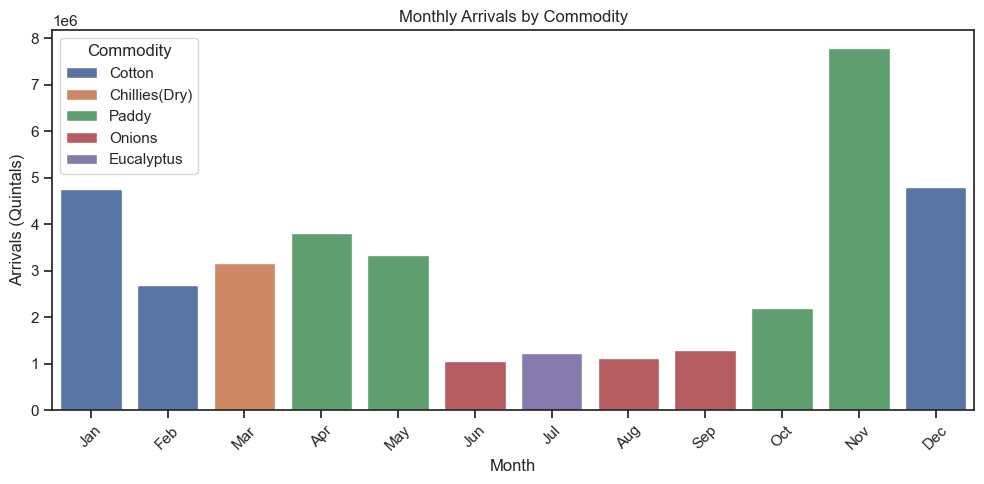

In [62]:
plt.figure(figsize=(10, 5))
sns.barplot(peak_arrivals, hue='CommName', y='Arrivals', x='Month')
plt.title('Monthly Arrivals by Commodity')
plt.ylabel('Arrivals (Quintals)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()

- Paddy

        Paddy production is typically higher during the months of November and December in India.
        This period coincides with the harvest of the kharif (winter) rice crop, which is sown in June and July.
          if the price will not suet we can store in cold storage and sell it in the 
- Cotton

        In Telangana, cotton production is generally more during the months of October to February, which is the harvesting period for the Kharif (summer) crop.
        The sowing season for cotton in Telangana typically begins in June, with harvesting occurring in late fall and early winter.
- Onions

        In Telangana, onion production is typically higher during the Rabi season, which runs from approximately December to May.

        The period between when Rabi harvest stocks are sold and when Kharif harvesting happens (August to November) is when we observe the prices of onion rise sharply. During this period, supply is low, when demand is high, hence prices rise.
  
        onions should be stored in a cool, dark place between 45 and 55 degrees F(7-10°C). Whole, raw onions will last two to three months when stored in a cool, dry place.

## Q8).Paddy

### Paddy arrivals by season

In [63]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue']]

C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\2984594550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paddy['DDate'] = pd.to_datetime(paddy['DDate'])
C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\2984594550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paddy['Season'] = paddy['DDate'].dt.month.apply(lambda x: 'Monsoon' if 6 <= x <= 9 else 'Non-Monsoon')


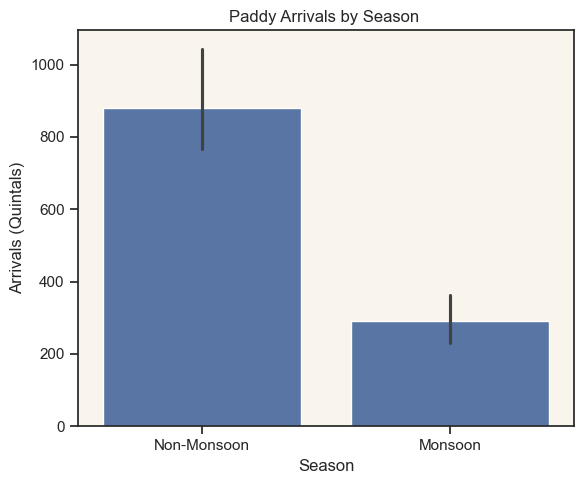

In [64]:
paddy = dff[dff['CommName'] == 'Paddy']
paddy['DDate'] = pd.to_datetime(paddy['DDate'])
paddy['Season'] = paddy['DDate'].dt.month.apply(lambda x: 'Monsoon' if 6 <= x <= 9 else 'Non-Monsoon')
plt.figure(figsize=(6, 5))
plt.gca().set_facecolor('#f9f5ec')
sns.set_style('whitegrid')
sns.barplot(data=paddy, x='Season', y='Arrivals')
plt.title('Paddy Arrivals by Season ')
plt.ylabel('Arrivals (Quintals)')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

### How does the average modal price of a key commodity like Paddy vary across different Agricultural Market Committees (AmcName)?

In [65]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue']]


Average Modal Price of Paddy Across AMC Names:
 AmcName
Suryapet              2552.646225
Vikarabad             2479.000000
Mancherial            2384.242424
Kesamudram            2319.953979
Jainath               2295.824675
Luxettipet            2277.594937
Ibrahimpatnam(JGL)    2265.389831
Dubbaka               2259.090909
Atmakur(WNP)          2240.000000
Kodad                 2203.000000
Name: Model, dtype: float64


C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\233761422.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paddy_prices_amc.index, y=paddy_prices_amc.values, palette='viridis')


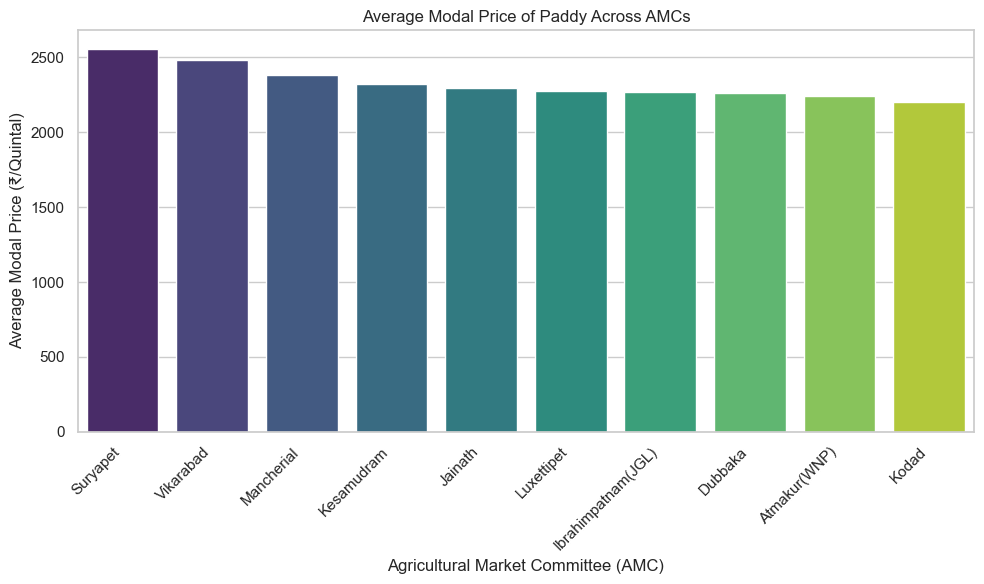

In [66]:
paddy_prices_amc = df[df['CommName'] == 'Paddy'].groupby('AmcName')['Model'].mean().sort_values(ascending=False).head(10)
print("\nAverage Modal Price of Paddy Across AMC Names:\n", paddy_prices_amc)

plt.figure(figsize=(10, 6))
sns.barplot(x=paddy_prices_amc.index, y=paddy_prices_amc.values, palette='viridis')
plt.xlabel('Agricultural Market Committee (AMC)')
plt.ylabel('Average Modal Price (₹/Quintal)')
plt.title('Average Modal Price of Paddy Across AMCs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Real-World Utility: Price variations for Paddy across AMCs (e.g., Gaddiannaram showing a different average price than Tandur in our sample) reflect the localized supply and demand dynamics, transportation costs, and market efficiencies in different regions of Telangana. Farmers can use this information to decide where to sell their produce to get the best possible price. Policymakers can identify regions where farmers consistently receive lower prices and investigate the underlying causes, such as lack of infrastructure, high transportation costs, or the presence of intermediaries affecting price realization. This can lead to targeted interventions to improve market access and price stability in those areas.

#

## Q9).Mango

### Are there any noticeable seasonal patterns in the arrivals and modal prices of a specific commodity like Mango?

In [67]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue']]

C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\796648006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['DDate'].dt.strftime('%b')
C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\796648006.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mango_seasonal = df[df['CommName'] == 'Mango'].groupby('Month')[['Arrivals', 'Model']].mean()



Seasonal Patterns for Mango (Average by Month):
           Arrivals        Model
Month                          
Jan      30.033600  6416.048000
Feb      96.240385  6346.822115
Mar     741.487598  5181.521654
Apr    2444.321535  3405.898659
May    2602.006387  2760.360221
Jun    1295.971199  3370.466338
Jul     417.298039  3159.094118
Aug     130.086420  3229.604938
Sep      16.555556  4111.111111
Oct      19.235294  6358.823529
Nov      36.276596  4305.212766
Dec      55.984848  4597.393939


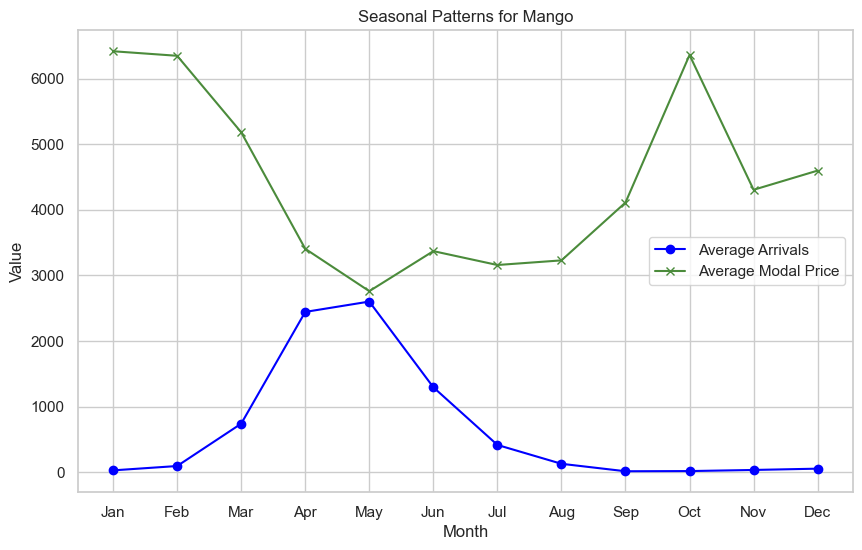

In [68]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = df['DDate'].dt.strftime('%b')
df['Year'] = df['DDate'].dt.year
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

mango_seasonal = df[df['CommName'] == 'Mango'].groupby('Month')[['Arrivals', 'Model']].mean()
print("\nSeasonal Patterns for Mango (Average by Month):\n", mango_seasonal)

plt.figure(figsize=(10, 6))
plt.plot(mango_seasonal.index, mango_seasonal['Arrivals'], label='Average Arrivals', marker='o',color="blue")
plt.plot(mango_seasonal.index, mango_seasonal['Model'], label='Average Modal Price', marker='x',color="#4B8B3B")
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Seasonal Patterns for Mango')
plt.xticks(mango_seasonal.index)
plt.legend()
plt.grid(True)
plt.show()

The seasonal peaks in Mango arrivals (typically around April-June in Telangana) and the corresponding impact on prices are vital for planning. Farmers can anticipate periods of high supply and potentially lower prices, allowing them to plan their harvesting and marketing strategies accordingly (e.g., staggered harvesting, storage, or processing). Traders can prepare for increased volumes and price fluctuations. Policymakers can use this information to develop storage facilities or promote processing industries to handle seasonal gluts and stabilize prices, benefiting both farmers and consumers in Hyderabad and beyond.

## Q10).What is the average price for different commodities, and which commodities exhibit the most price volatility within a single day?

In [69]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue']]


Average Price Range by Commodity:
 CommName
Castor                           31729.670504
Garlic                           30126.043668
Amchur                           19651.384615
Fish                             16666.666667
Chillies(Dry)                    13499.310625
Ajwan                            11670.035842
Nashpati(Pear)                   11635.844995
Gingelly                         10582.101408
Teisel Gourd(Boda Kakarakaya)     7876.150342
Cotton                            7511.256710
Name: Model, dtype: float64


C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\2659717568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='plasma')


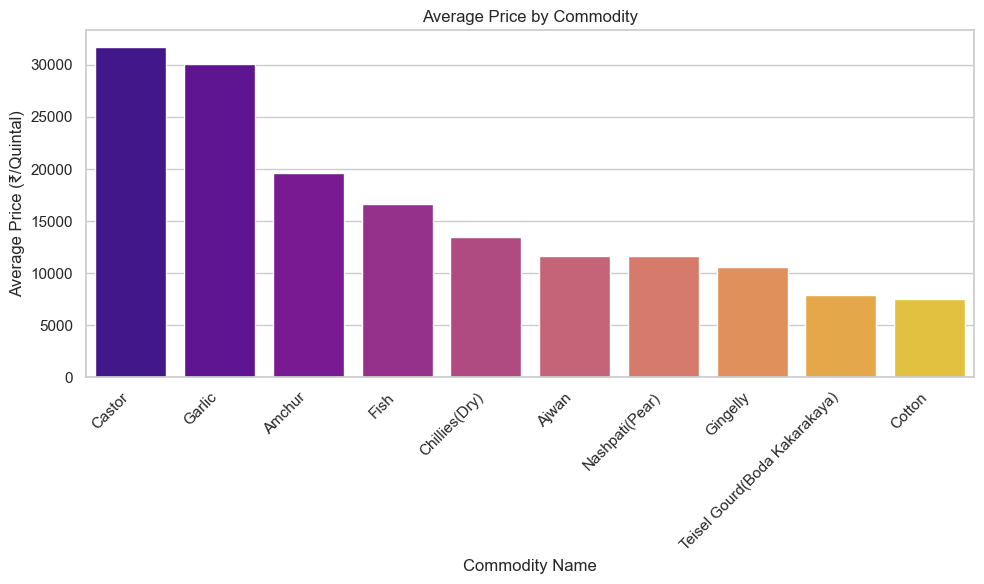

In [70]:
avg_price = df[df['CommName']!="Cattle(All)"].groupby('CommName')['Model'].mean().sort_values(ascending=False).head(10)
print("\nAverage Price Range by Commodity:\n", avg_price)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='plasma')
plt.xlabel('Commodity Name')
plt.ylabel('Average Price (₹/Quintal)')
plt.title('Average Price by Commodity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Real-World Utility: A high price range for commodities like Chillies (Dry) suggests significant variations in quality, grade, or the timing of sales within a single day. This can create uncertainty for farmers and buyers. It might indicate a need for better standardization and grading systems to reduce price disparities based on quality. High volatility can also present opportunities for informed traders but risks for those with less market knowledge. Policymakers might consider interventions to improve price transparency and reduce excessive speculation.

## Q11).Chilli(Dry)

### How does the price difference evolve over time for(chilli(Dry)) a volatile commodity?

In [71]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Month']]
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = df['DDate'].dt.strftime('%b')
df['Year'] = df['DDate'].dt.year
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\4062744301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['DDate'].dt.strftime('%b')


C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\3124667474.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chillies_dry_seasonal = df[df['CommName'] == 'Chillies(Dry)'].groupby('Month')[['Arrivals', 'Model']].mean()



Seasonal Patterns for Chillies(Dry) (Average by Month):
           Arrivals         Model
Month                           
Jan    1216.473536  13110.296060
Feb    2233.141336  14164.107679
Mar    2259.122141  15784.729479
Apr    1830.982222  15438.400831
May     801.152267  12115.097357
Jun     444.102672  10956.118143
Jul     195.477537  11523.590682
Aug     182.167254  12056.602113
Sep     176.265579  13478.253709
Oct     217.923222  13559.365609
Nov     274.742595  13348.180153
Dec     353.910511  12628.823864


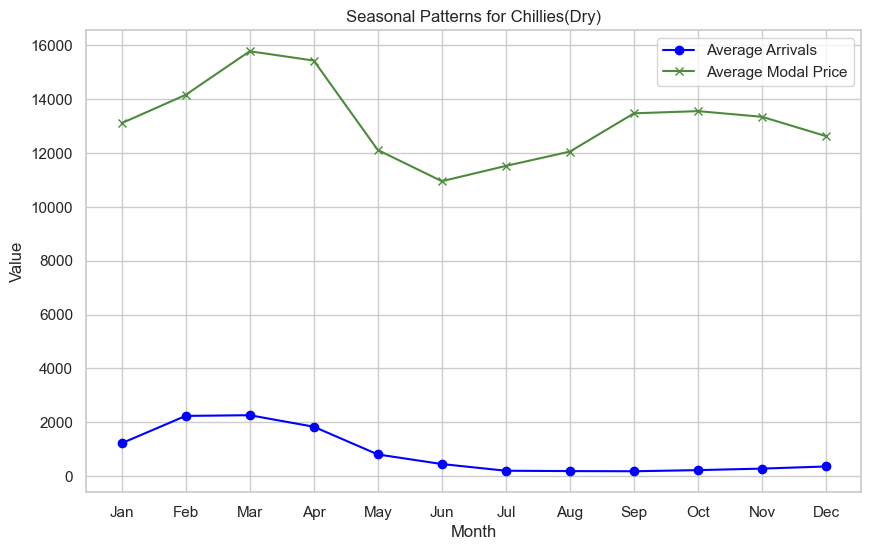

In [72]:
chillies_dry_seasonal = df[df['CommName'] == 'Chillies(Dry)'].groupby('Month')[['Arrivals', 'Model']].mean()
print("\nSeasonal Patterns for Chillies(Dry) (Average by Month):\n", chillies_dry_seasonal)

plt.figure(figsize=(10, 6))
plt.plot(chillies_dry_seasonal.index, chillies_dry_seasonal['Arrivals'], label='Average Arrivals', marker='o',color="blue")
plt.plot(chillies_dry_seasonal.index, chillies_dry_seasonal['Model'], label='Average Modal Price', marker='x',color='#4B8B3B')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Seasonal Patterns for Chillies(Dry)')
plt.xticks(chillies_dry_seasonal.index)
plt.legend()
plt.grid(True)
plt.show()

    The plot shows how the daily price range of a commodity changes over time.
    Volatility trends (increasing, decreasing, or constant) can be observed.
    Spikes may correlate with seasonal patterns or market events.
    The analysis informs risk assessment and trading strategies.
    It helps policymakers stabilize prices and ensure food security.

## 12).Which markets consistently offer the highest prices for specific commodities like Carrot or Paddy etc?

In [73]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Month']]

In [74]:
mchpc = df.groupby(['AmcName','CommName'])['Model'].sum().sort_values(ascending=False).reset_index().head(10)

Text(0.5, 1.0, 'Markets that has highest price for specific commodities')

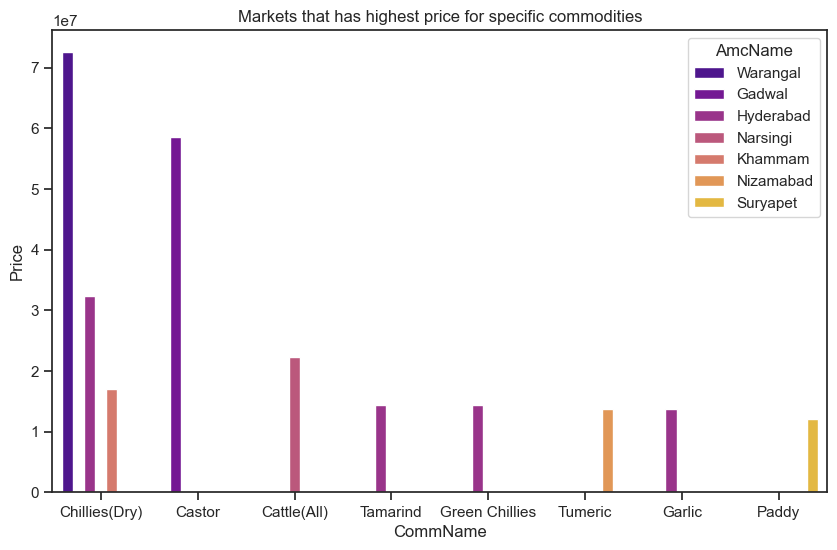

In [75]:
plt.figure(figsize=(10, 6))
sns.set_style("ticks")
sns.barplot(mchpc,hue='AmcName',y='Model',x='CommName',palette='plasma')
plt.xlabel('CommName')
plt.ylabel('Price')
plt.title('Markets that has highest price for specific commodities')

## Q13).Onions

### How do Onions arrivals peak annually from 2021 to 2025?
    Why It Matters: Peaks require logistics planning.

In [76]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model']]

In [77]:
df["YardName"].unique()

array(['Gudumalkapur', 'Gaddiannaram', 'Mahabubmansion', 'L.B Nagar',
       'Pargi', 'Tandur', 'Suryapet', 'Mahaboobnagar', 'Narayanpet',
       'Navabpet', 'Tirmalagiri', 'Vemulawada', 'Badepally', 'Shadnagar',
       'Devarakadra', 'Burgampadu', 'Nagarkurnool', 'Karimnagar',
       'Meeralamandi', 'W.P.Town', 'Atmakur', 'Nizamabad', 'Kesamudram',
       'Vantimamidi', 'Choppadandi', 'Asifabad', 'Enkoor', 'Peddapally',
       'Gajwel', 'Nekkonda', 'Bela', 'Bhongir', 'Jagtial', 'Vikarabad',
       'Adilabad', 'Boath', 'Sadasivapet', 'Luxettipet', 'Cherial',
       'Parkal', 'Chouttuppal', 'Khammam', 'Kubeer', 'Sarangapur',
       'Nakrekal', 'Ghanpur', 'Jammikunta', 'Khanpur', 'Metpally',
       'Achampet', 'Echoda', 'Jogipet', 'Madnoor', 'Warangal', 'W.P Road',
       'Madannapeta', 'Bowenpally', 'Chennur', 'Ibrahimpatnam',
       'Babbuguda', 'Alair', 'Korutla', 'Yellareddy', 'Birkur',
       'Kollapur', 'Thorruru', 'Julurupadu', 'Bellampally', 'Kataram',
       'Mahabubabad', 'Pitl

C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\4278611011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Onions['Month'] = Onions['DDate'].dt.strftime('%b')
C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\4278611011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Onions['Year'] = Onions['DDate'].dt.year
C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\4278611011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

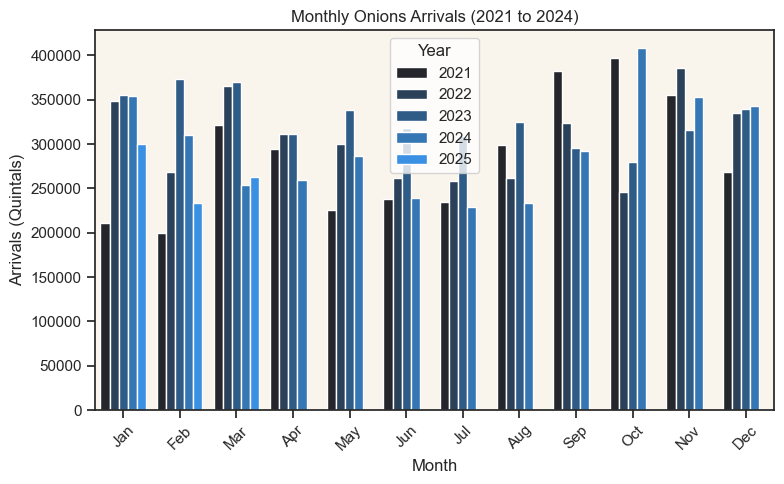

In [78]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Onions = df[df['CommName'] == 'Onions']
Onions['Month'] = Onions['DDate'].dt.strftime('%b')
Onions['Year'] = Onions['DDate'].dt.year
Onions['Month'] = pd.Categorical(Onions['Month'], categories=month_order, ordered=True)
monthly_Onions = Onions.groupby(['Year','Month'])['Arrivals'].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.gca().set_facecolor('#f9f5ec')
sns.barplot(data=monthly_Onions, x='Month', y='Arrivals',hue='Year',color='#1E90FF')
plt.title('Monthly Onions Arrivals (2021 to 2024)')
plt.ylabel('Arrivals (Quintals)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    The majority of onion production, around 60%, comes from the Rabi season. 
    Kharif and Late Kharif crops contribute about 20% each. 

    To preserve onions for a long time, store them in a cool, dry, well-ventilated place like a pantry or cellar.(7-10d)

### top arrivals of Onions

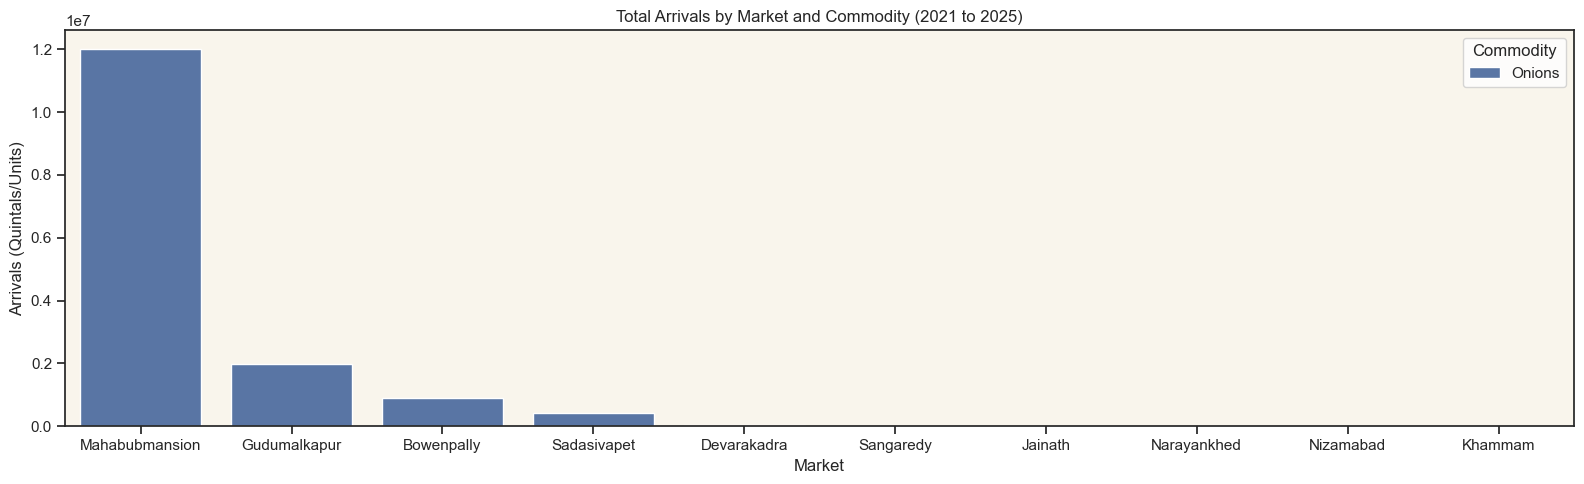

In [79]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Year']]
df = df[df['CommName'].isin(['Onions'])]
market_arrivals1 = df.groupby(['YardName', 'CommName'])['Arrivals'].sum().nlargest(10).reset_index().head(10)

# Plot
plt.figure(figsize=(16, 5))
plt.gca().set_facecolor('#f9f5ec')
sns.barplot(data=market_arrivals1, x='YardName', y='Arrivals', hue='CommName')
plt.title('Total Arrivals by Market and Commodity (2021 to 2025)')
plt.ylabel('Arrivals (Quintals/Units)')
plt.xlabel('Market')
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()

### What is the Onions Price Range in Hyderabad(Mahabubmansion in malakpet) from 2021 to 2025?
    Why It Matters: Wide ranges require flexible pricing.

In [80]:
dff["Year"]=dff["DDate"].dt.year

In [81]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Year']]

In [82]:
df = df[df['Arrivals'] < df['Arrivals'].quantile(0.99)]  # Remove outliers

In [83]:
Onions = df[(df['CommName']=='Onions') & (df['AmcName']=='Hyderabad')]

In [84]:
Onions

,DDate,AmcName,YardName,CommName,VarityName,Arrivals,Minimum,Maximum,Model,Revenue,Year
427,2021-01-01,Hyderabad,Mahabubmansion,Onions,No.I,2022.0,2000.0,3000.0,2500.0,5055000.0,2021
430,2021-01-02,Hyderabad,Mahabubmansion,Onions,No.I,2104.0,2000.0,3100.0,2400.0,5049600.0,2021
442,2021-01-04,Hyderabad,Mahabubmansion,Onions,No.I,2449.0,1600.0,3200.0,2600.0,6367400.0,2021
461,2021-01-05,Hyderabad,Mahabubmansion,Onions,No.I,2249.0,1800.0,3200.0,2400.0,5397600.0,2021
478,2021-01-06,Hyderabad,Mahabubmansion,Onions,No.I,2748.0,2200.0,3200.0,2400.0,6595200.0,2021
...,...,...,...,...,...,...,...,...,...,...,...
432044,2024-12-06,Hyderabad,Mahabubmansion,Onions,No.II,3898.0,500.0,3400.0,2600.0,10134800.0,2024
432060,2024-12-07,Hyderabad,Mahabubmansion,Onions,No.II,3475.0,500.0,3900.0,2800.0,9730000.0,2024
432077,2024-12-09,Hyderabad,Mahabubmansion,Onions,No.II,4661.0,500.0,3600.0,2800.0,13050800.0,2024
432095,2024-12-10,Hyderabad,Mahabubmansion,Onions,No.II,4573.0,500.0,4200.0,3000.0,13719000.0,2024


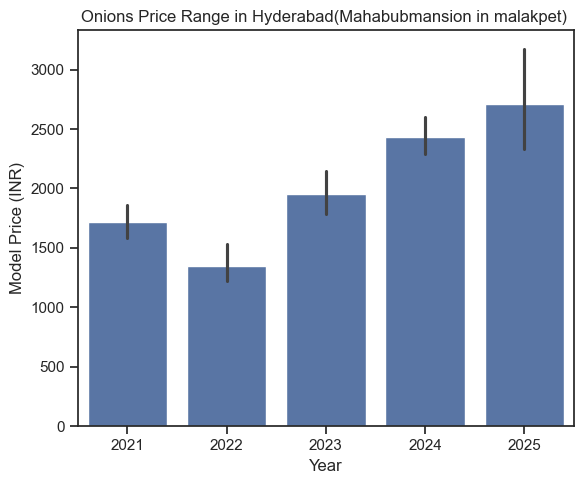

In [85]:
df['Year'] = pd.Categorical(df['Year'], ordered=True, categories=sorted(df['Year'].unique()))
plt.figure(figsize=(6, 5))
sns.barplot(data=Onions,x='Year', y='Model')
plt.title('Onions Price Range in Hyderabad(Mahabubmansion in malakpet) ')
plt.ylabel('Model Price (INR)')
plt.tight_layout()
plt.show()

### Seasonal Patterns for Onions

In [86]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Year']]
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = df['DDate'].dt.strftime('%b')
df['Year'] = df['DDate'].dt.year
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)


C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\2335200871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Onion_seasonal = df[df['CommName'] == 'Onions'].groupby('Month')[['Arrivals', 'Model']].mean()



Seasonal Patterns for Onion_seasonal (Average by Month):
           Arrivals        Model
Month                          
Jan    2363.439759  1795.356928
Feb    2259.145188  1803.123980
Mar    2204.436667  1461.471989
Apr    2156.155403   929.362637
May    2061.304839  1046.125448
Jun    1843.750436  1432.076789
Jul    1848.491039  1612.007168
Aug    1985.370567  1782.895390
Sep    2324.149372  1931.940754
Oct    2419.189091  2294.598182
Nov    2570.229508  2593.719490
Dec    2303.277778  2184.951613


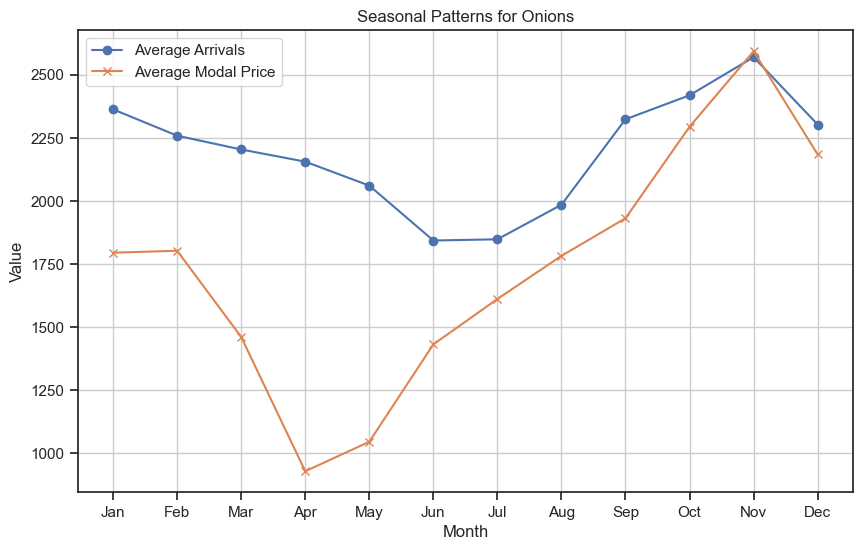

In [87]:
Onion_seasonal = df[df['CommName'] == 'Onions'].groupby('Month')[['Arrivals', 'Model']].mean()
print("\nSeasonal Patterns for Onion_seasonal (Average by Month):\n", Onion_seasonal)

plt.figure(figsize=(10, 6))
plt.plot(Onion_seasonal.index, Onion_seasonal['Arrivals'], label='Average Arrivals', marker='o')
plt.plot(Onion_seasonal.index, Onion_seasonal['Model'], label='Average Modal Price', marker='x')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Seasonal Patterns for Onions')
plt.xticks(mango_seasonal.index)
plt.legend()
plt.grid(True)
plt.show()

## Q14).Turmeric

### Turmeric Arrivals by yards

In [88]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Year']]

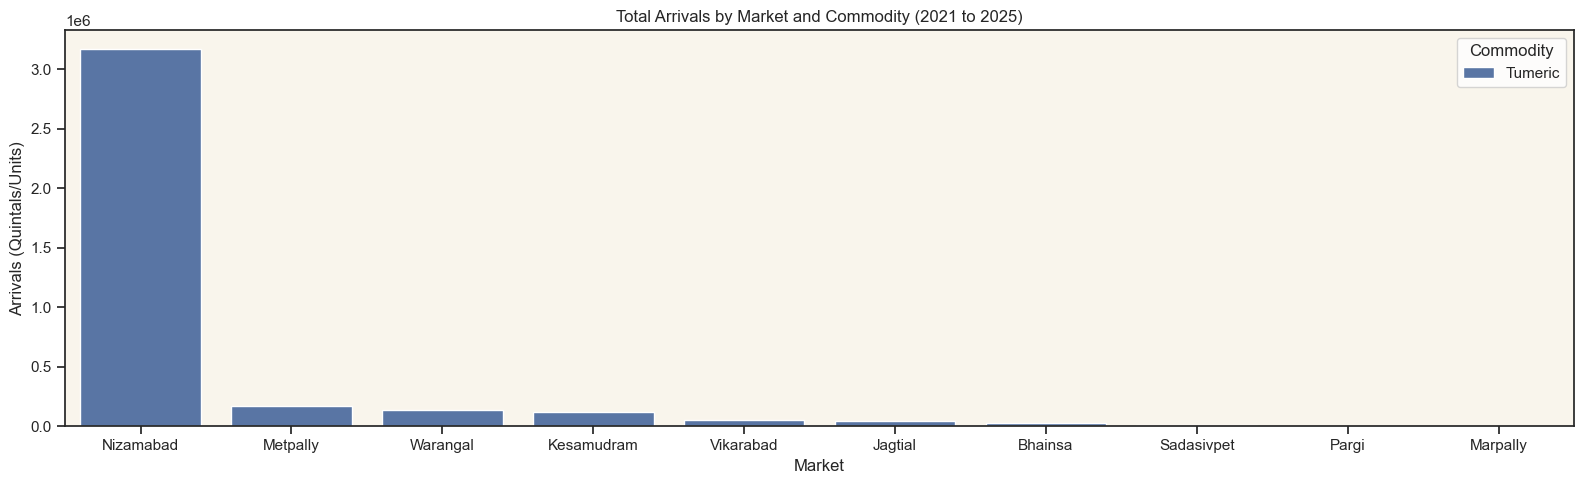

In [89]:
df = df[df['CommName'].isin(['Tumeric'])]
market_arrivals1 = df.groupby(['AmcName', 'CommName'])['Arrivals'].sum().nlargest(10).reset_index().head(10)

# Plot
plt.figure(figsize=(16, 5))
plt.gca().set_facecolor('#f9f5ec')
sns.barplot(data=market_arrivals1, x='AmcName', y='Arrivals', hue='CommName')
plt.title('Total Arrivals by Market and Commodity (2021 to 2025)')
plt.ylabel('Arrivals (Quintals/Units)')
plt.xlabel('Market')
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()

##

### How do minimum and maximum prices for turmeric differ in Nizamabad from 2021 to 2025?
    Why It Matters: Price spreads indicate negotiation room.

In [90]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Year']]

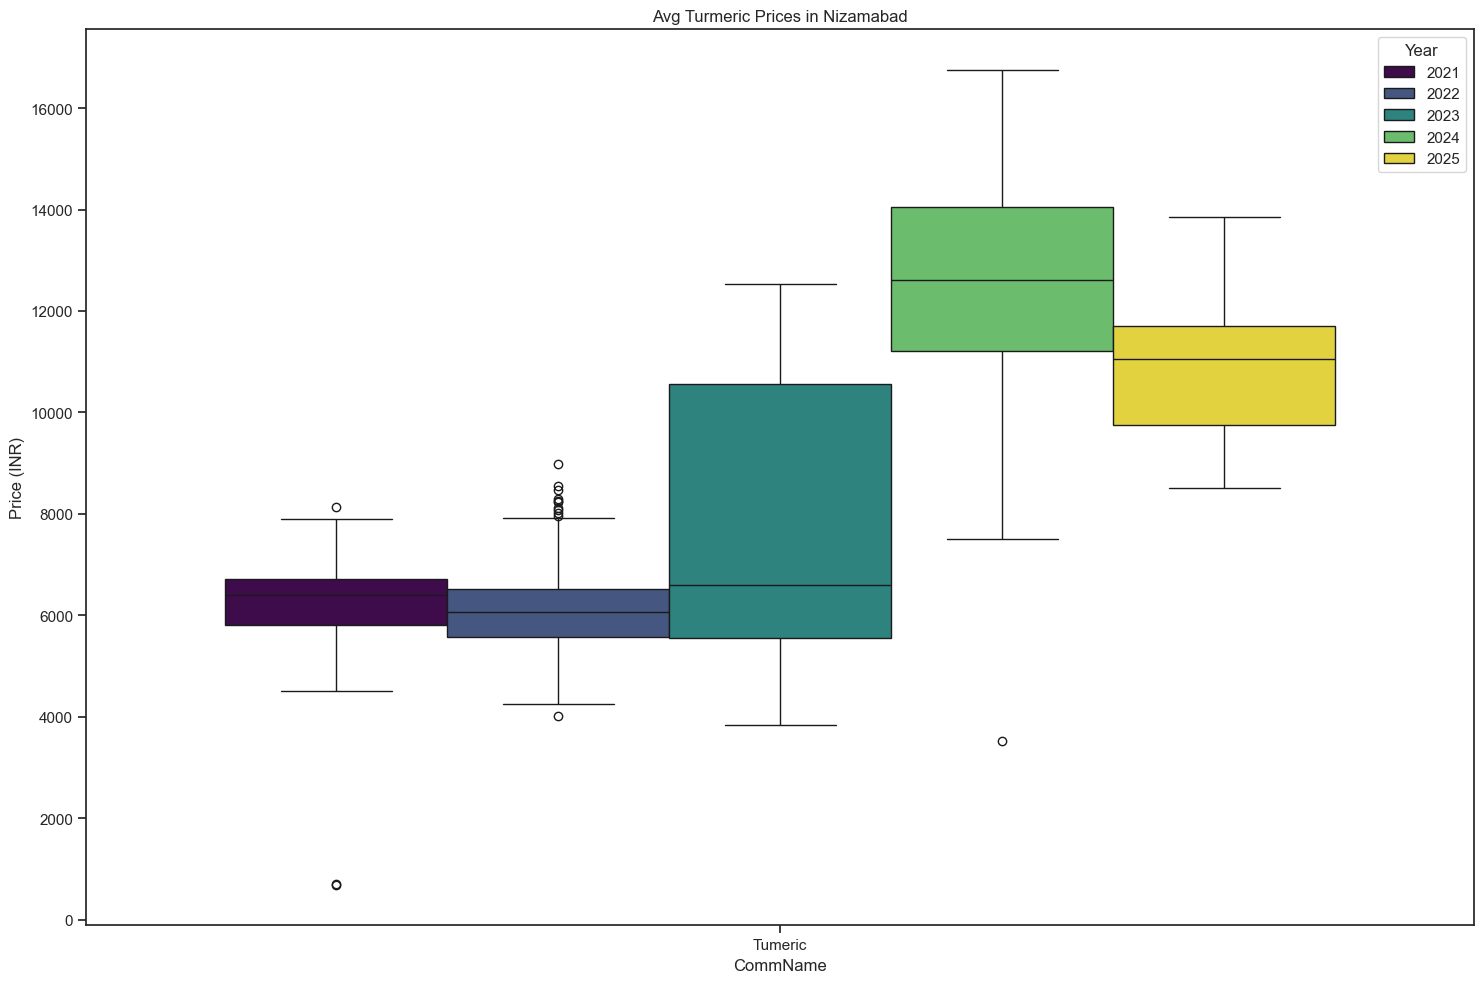

In [91]:
turmeric = df[(df['CommName'] == 'Tumeric') & (df['AmcName'] == 'Nizamabad')]
plt.figure(figsize=(15, 10))
sns.boxplot(data=turmeric, x='CommName', y='Model',hue="Year",palette="viridis")
plt.title('Avg Turmeric Prices in Nizamabad')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

### How do turmeric arrivals vary by variety in Nizamabad from 2021 to 2025?
    Why It Matters: Optimizes processing focus.

In [92]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Year']]

In [93]:
df["AmcName"].unique()

array(['Gudimalkapur', 'Gaddiannaram', 'Hyderabad', 'Pargi', 'Tandur',
       'Suryapet', 'Mahbubnagar', 'Narayanpet', 'Navabpet(MBNR)',
       'Thirumalagiri', 'Vemulawada', 'Badepally', 'Shadnagar',
       'Devarakadra', 'Burgampahad', 'Nagarkurnool', 'Karimnagar',
       'Wanaparthy Town', 'Atmakur(WNP)', 'Nizamabad', 'Kesamudram',
       'Vantimamidi', 'Choppadandi', 'Asifabad', 'Enkoor', 'Peddapally',
       'Gajwel', 'Nekkonda', 'Jainath', 'Bhongir', 'Jagtial', 'Vikarabad',
       'Adilabad', 'Boath', 'Sadasivpet', 'Luxettipet', 'Cherial',
       'Parkal', 'Chouttuppal', 'Khammam', 'Kubeer', 'Sarangapur',
       'Nakrekal', 'Ghanpur', 'Jammikunta', 'Khanapur', 'Metpally',
       'Achampet', 'Ichoda', 'Jogipet', 'Madnoor', 'Warangal',
       'Wanaparthy Road', 'Bowenpally', 'Chennur', 'Ibrahimpatnam(RR)',
       'Narsingi', 'Alair', 'Korutla', 'Yellareddy', 'Birkur', 'Kollapur',
       'Thorrur', 'Bellampally', 'Kataram', 'Mahabubabad', 'Pitlam',
       'Gadwal', 'Palakurthy', 'Ma

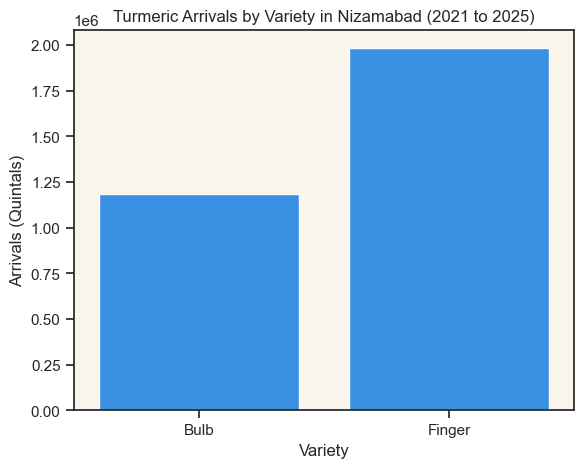

In [94]:
turmeric = df[(df['CommName'] == 'Tumeric') & (df['AmcName'] == 'Nizamabad')]
variety_arrivals = turmeric.groupby('VarityName')['Arrivals'].sum().reset_index()
plt.figure(figsize=(6, 5))
plt.gca().set_facecolor('#f9f5ec')
sns.set_style("whitegrid")
sns.barplot(data=variety_arrivals, x='VarityName', y='Arrivals',color='#1E90FF')
plt.title('Turmeric Arrivals by Variety in Nizamabad (2021 to 2025)')
plt.ylabel('Arrivals (Quintals)')
plt.xlabel('Variety')
plt.tight_layout()
plt.show()

### prices by variety

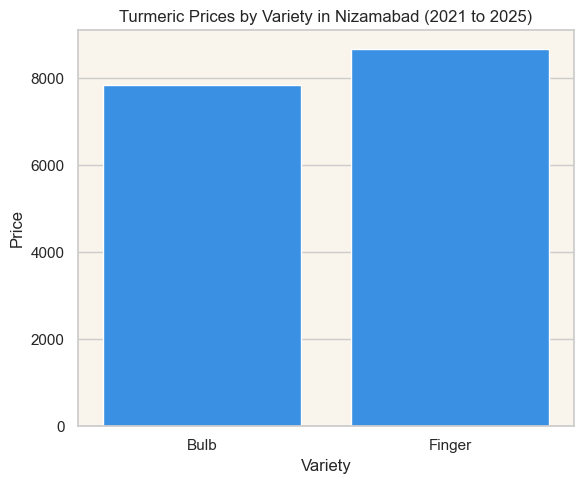

In [98]:
turmeric = df[(df['CommName'] == 'Tumeric') & (df['AmcName'] == 'Nizamabad')]
variety_arrivals = turmeric.groupby('VarityName')['Model'].mean().reset_index()
plt.figure(figsize=(6, 5))
plt.gca().set_facecolor('#f9f5ec')
sns.set_style("whitegrid")
sns.barplot(data=variety_arrivals, x='VarityName', y='Model',color='#1E90FF')
plt.title('Turmeric Prices by Variety in Nizamabad (2021 to 2025)')
plt.ylabel('Price')
plt.xlabel('Variety')
plt.tight_layout()
plt.show()

# Other

## Q).Which markets has the highest stock arrivals for each month.

In [96]:
df = dff[['DDate','AmcName', 'YardName', 'CommName', 'VarityName', 'Arrivals',
       'Minimum', 'Maximum', 'Model','Revenue','Year']]

C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\529274224.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mx = pd.DataFrame(df.groupby(['Year','Month'])['Arrivals'].sum())
C:\Users\kapuj\AppData\Local\Temp\ipykernel_16204\529274224.py:11: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1E90FF'` for the same effect.

  sns.barplot(mx,x='Month',y='Arrivals',hue='Year',color='#1E90FF')


<Axes: xlabel='Month', ylabel='Arrivals'>

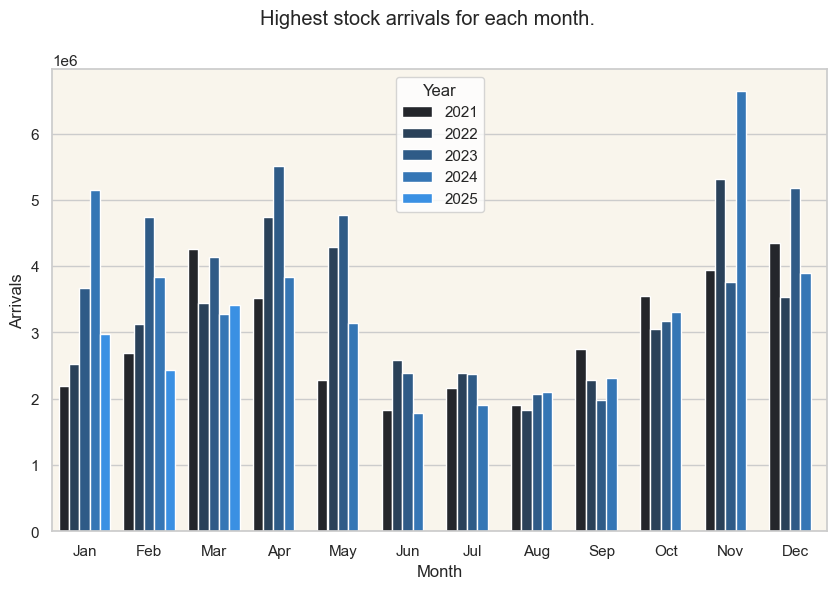

In [97]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = df['DDate'].dt.strftime('%b')
df['Year'] = df['DDate'].dt.year
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
mx = pd.DataFrame(df.groupby(['Year','Month'])['Arrivals'].sum())
plt.figure(figsize=(10, 6))
plt.suptitle('Highest stock arrivals for each month.')
sns.set_style("whitegrid")
plt.gca().set_facecolor('#f9f5ec')
sns.barplot(mx,x='Month',y='Arrivals',hue='Year',color='#1E90FF')

plt.figure(figsize=(10, 6))
plt.suptitle('Highest stock arrivals for each month.')
sns.set_style("whitegrid")
sns.barplot(mx,x='Month',y='Arrivals',hue='Year')

## -

df.rename(columns={'AmcName':'MANDAL_NAM'},inplace=True)

gdf = gpd.read_file(r"C:\Users\kapuj\Downloads\Telangana_Shape_Files\20231018__Telangana_Shape_Files\TS_Mandal_Boundary_632\TS_Mandal_Boundary_632_FINAL.shp")
merged = gdf.merge(df, on="MANDAL_NAM")
merged.plot(column='Model', cmap='YlGnBu', legend=True)